In [1]:
import stlearn as st
import scanpy as sc

In [2]:
# import pandas as pd
# from scipy.io import mmread
# from anndata import AnnData
# count_matrix = mmread("/afm01/UQ/Q1851/ExternalData/sciSpace_human_embryo/GSE166692_sciSpace_count_matrix.mtx")
# data = AnnData(count_matrix.T)
# data.X = data.X.todense()
# metadata = pd.read_table("/afm01/UQ/Q1851/ExternalData/sciSpace_human_embryo/GSE166692_sciSpace_cell_metadata.tsv")
# metadata = metadata[['sample','coords.x1', 'coords.x2','umap1', 'umap2', 'cluster', 'partition', 'sub_cluster','final_cluster_label', 'manual_annotation_2', 'anatomical_annotation','brain_region']]

# data.obs_names = metadata.index
# data.obs = metadata

# data.obs = data.obs.rename(columns={"coords.x1": "imagecol", "coords.x2":"imagerow"})
# data.obsm["X_umap"] = data.obs[["umap1","umap2"]].values

# gene_metadata = pd.read_table("/afm01/UQ/Q1851/ExternalData/sciSpace_human_embryo/GSE166692_sciSpace_gene_metadata.tsv")
# data.var_names = gene_metadata["gene_short_name"].values

In [3]:
# library_id = "sciSpace",
# image_path = None,
# scale = 1.0
# quality = "hires"
# spot_diameter_fullres = 1
# background_color = "white"
# import numpy as np
# from PIL import Image
# # Create image
# max_size = np.max([data.obs["imagecol"].max(), data.obs["imagerow"].max()])
# max_size = int(max_size + 0.1 * max_size)

# if background_color == "black":
#     image = Image.new("RGBA", (max_size, max_size), (0, 0, 0, 0))
# else:
#     image = Image.new("RGBA", (max_size, max_size), (255, 255, 255, 255))
# imgarr = np.array(image)

# # Create spatial dictionary
# data.uns["spatial"] = {}
# data.uns["spatial"][library_id] = {}
# data.uns["spatial"][library_id]["images"] = {}
# data.uns["spatial"][library_id]["images"][quality] = imgarr
# data.uns["spatial"][library_id]["use_quality"] = quality
# data.uns["spatial"][library_id]["scalefactors"] = {}
# data.uns["spatial"][library_id]["scalefactors"][
#     "tissue_" + quality + "_scalef"
# ] = scale
# data.uns["spatial"][library_id]["scalefactors"][
#     "spot_diameter_fullres"
# ] = spot_diameter_fullres

# data.var_names_make_unique()
# data.obs = data.obs.rename(columns={"imagecol": "imagerow", "imagerow":"imagecol"})
# data.obsm["spatial"] = data.obs[["imagecol","imagerow"]].values


In [2]:
data = sc.read_h5ad("/afm01/UQ/Q1851/ExternalData/sciSpace_human_embryo/sciSpace_adata.h5ad")

In [3]:
data

AnnData object with n_obs × n_vars = 121365 × 35757
    obs: 'sample', 'imagerow', 'imagecol', 'umap1', 'umap2', 'cluster', 'partition', 'sub_cluster', 'final_cluster_label', 'manual_annotation_2', 'anatomical_annotation', 'brain_region', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'max_slide_id'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'anatomical_annotation_colors', 'spatial'
    obsm: 'X_umap', 'spatial'

In [4]:
data.obs["max_slide_id"].unique()

['slide_1D', 'slide_2H', 'slide_2G', 'slide_1F', 'slide_1G', ..., 'slide_3F', 'slide_3H', 'slide_4E', 'slide_4C', 'slide_3D']
Length: 14
Categories (14, object): ['slide_1D', 'slide_2H', 'slide_2G', 'slide_1F', ..., 'slide_3H', 'slide_4E', 'slide_4C', 'slide_3D']

In [5]:
st.settings.set_figure_params(dpi=300)

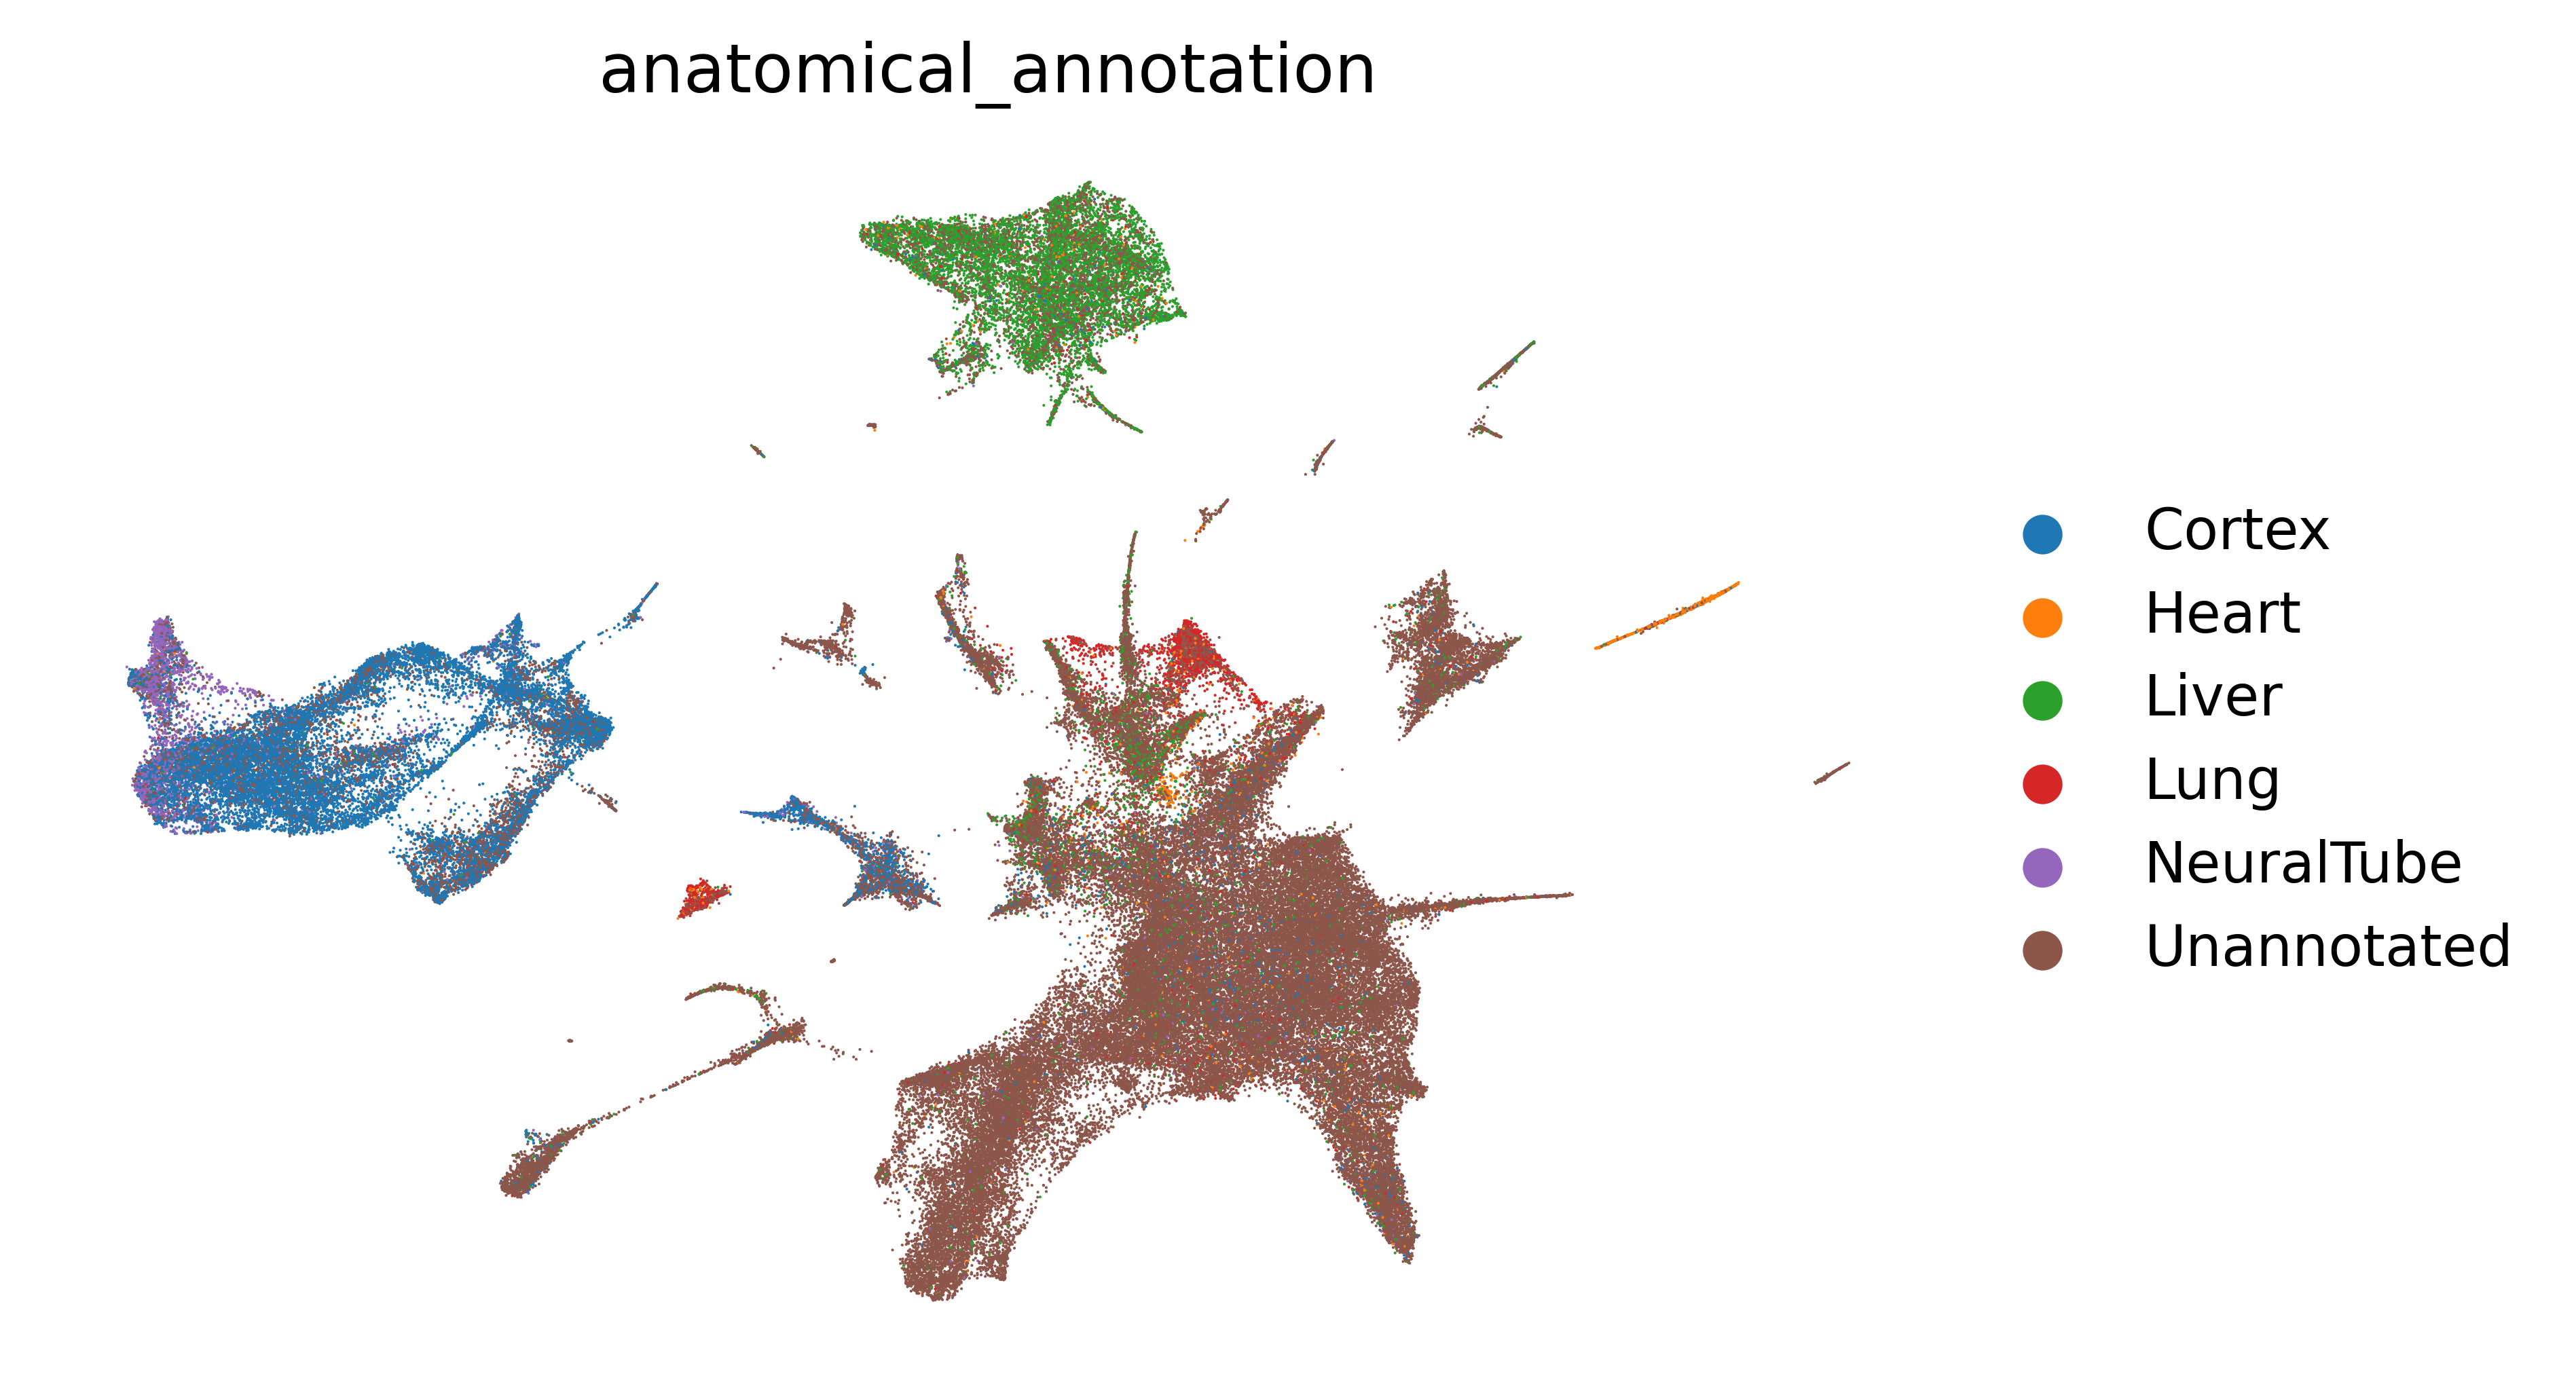

In [6]:
sc.pl.umap(data,color="anatomical_annotation",frameon=False)

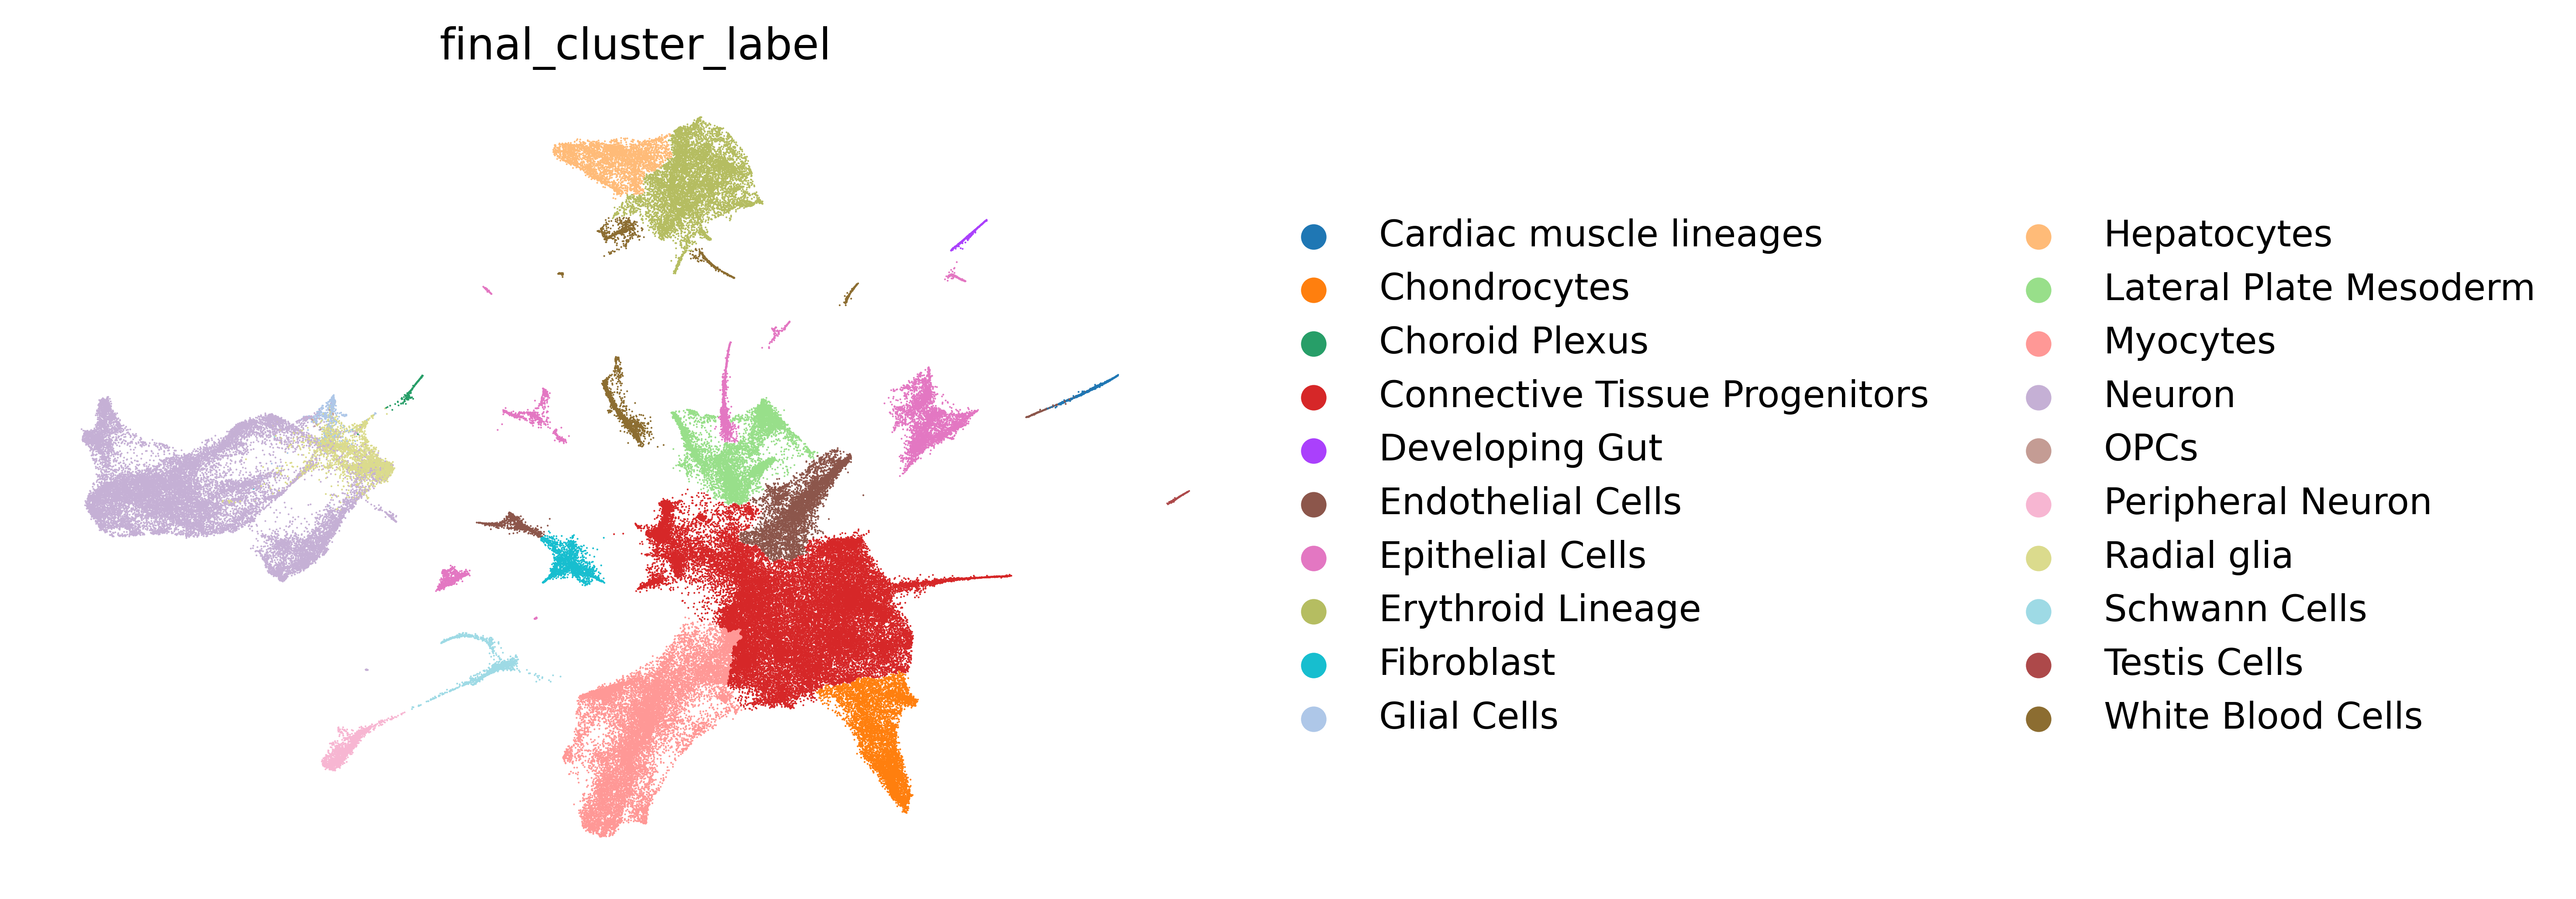

In [7]:
sc.pl.umap(data,color="final_cluster_label",frameon=False)

In [8]:
sc.pp.filter_cells(data, min_genes=200)
sc.pp.filter_genes(data, min_cells=3)

In [9]:
data.var['mt'] = data.var_names.str.startswith('Mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(data, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [10]:
data = data[data.obs.n_genes_by_counts < 7000, :]

In [11]:
sc.pp.normalize_total(data, target_sum=1e4)

/home/uqdpham4/.conda/envs/stlearn/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [12]:
sc.pp.log1p(data)

In [13]:
sc.pp.highly_variable_genes(data, min_mean=0.0125, max_mean=3, min_disp=0.5)

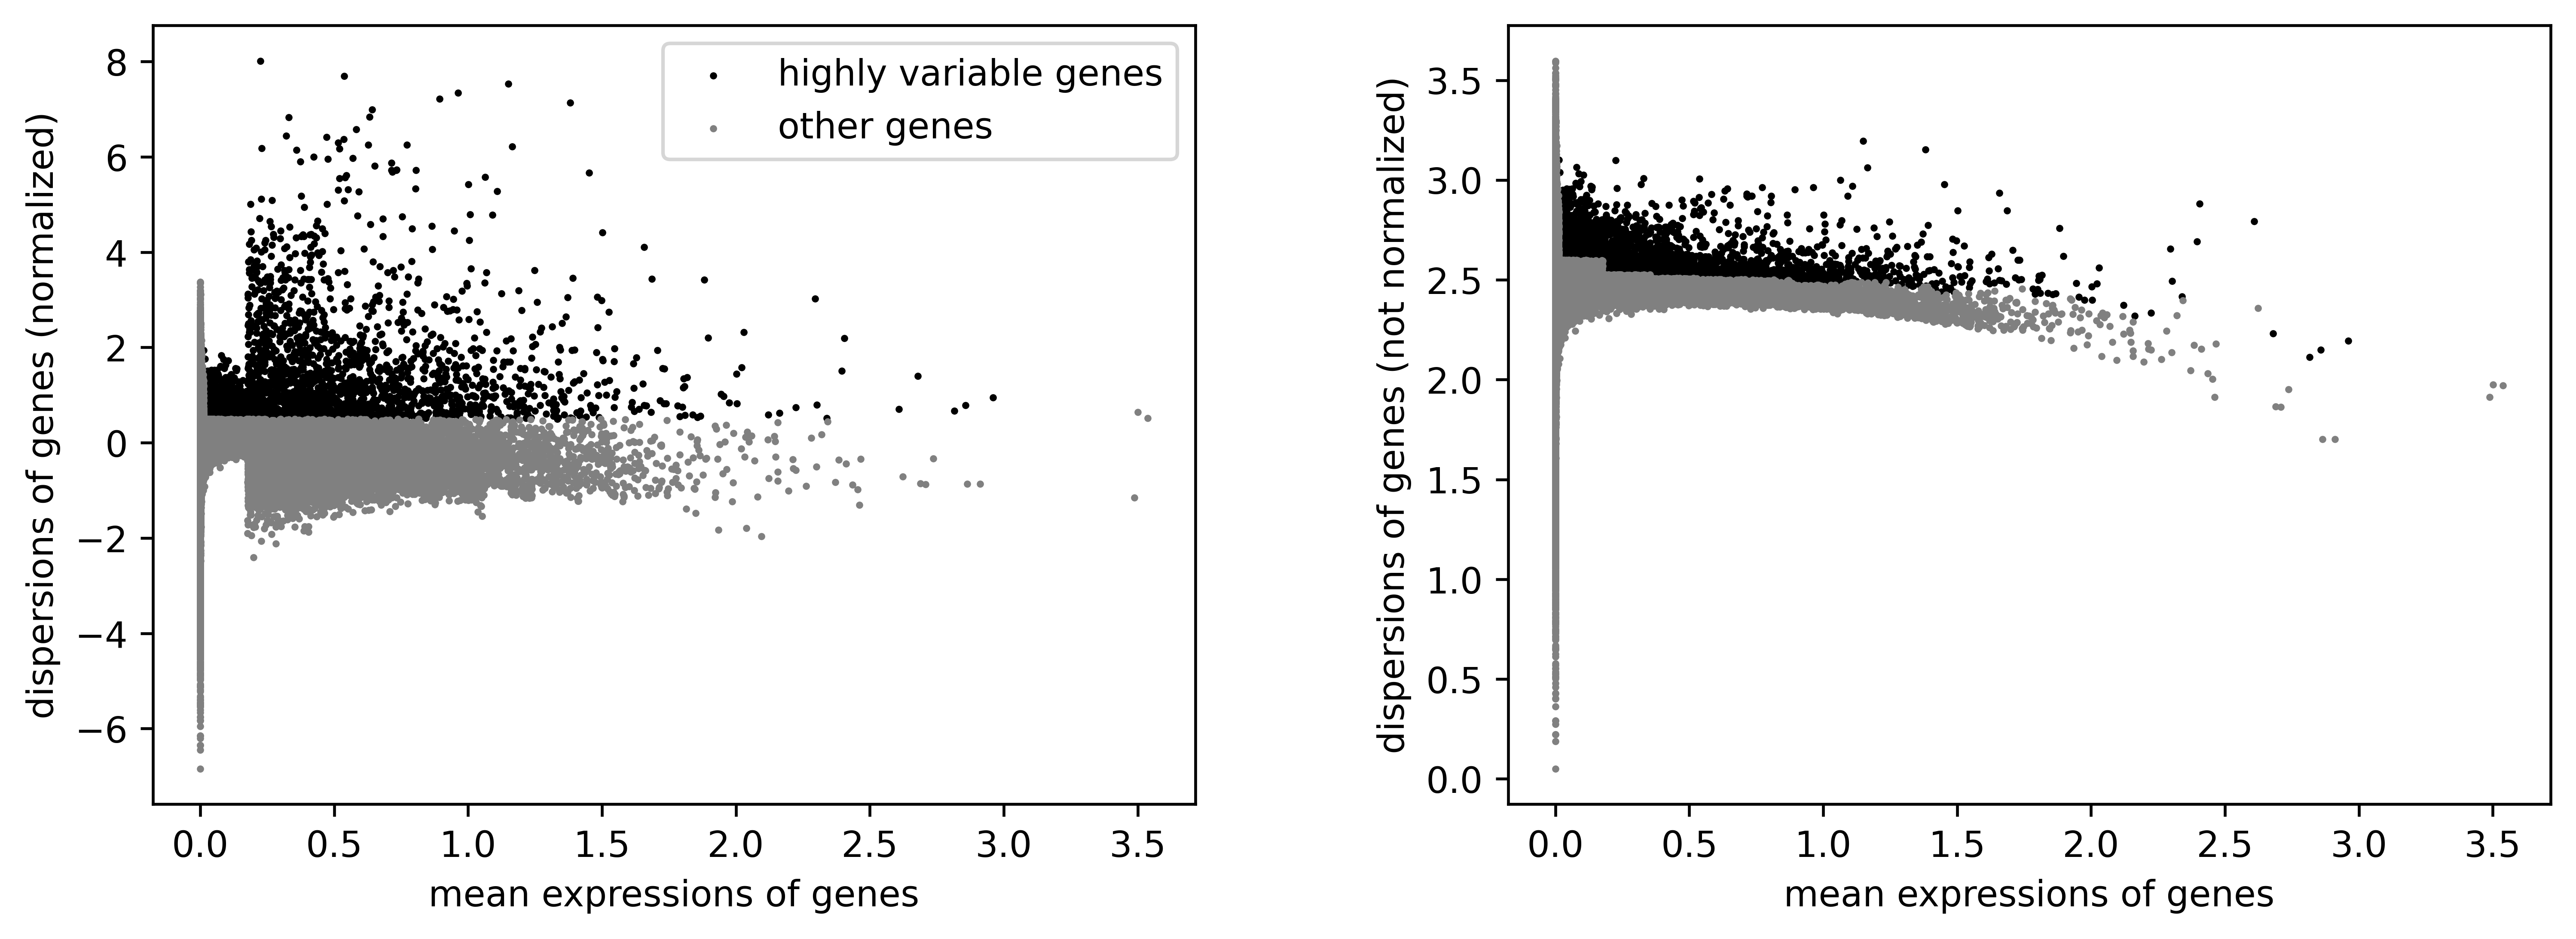

In [14]:
sc.pl.highly_variable_genes(data)

In [15]:
data.raw = data

In [16]:
data = data[:, data.var.highly_variable]

In [17]:
sc.pp.scale(data, max_value=10)

/home/uqdpham4/.conda/envs/stlearn/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:810: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
sample = data[data.obs[data.obs.final_cluster_label.isin(["Neuron","Glial Cells","Radial glia"]) ].index,:]

In [19]:
import numpy as np

In [20]:
sample = sample[sample.obs[sample.obs.anatomical_annotation == "Cortex"].index,:]

In [21]:
sc.tl.pca(sample, svd_solver='arpack')

In [22]:
sc.pp.neighbors(sample, n_neighbors=10, n_pcs=20)

In [23]:
# sc.tl.paga(sample, groups='final_cluster_label')

In [24]:
# sc.tl.umap(sample)

In [103]:
sample.obs

sample     imagerow     imagecol      umap1     umap2  \
A01_G01_RT_1141       1   484.883014  1113.268953  -8.820170 -0.734612   
A01_G01_RT_115        1   320.877811   769.223534 -12.220536  0.950270   
A01_G01_RT_116        1   324.526039   507.864636 -10.414320  1.567444   
A01_G01_RT_1241       1   624.422556   320.862887 -10.849363  2.172952   
A01_G01_RT_134        1   602.307325   868.300033  -7.191425  2.986576   
...                 ...          ...          ...        ...       ...   
H12_E08_RT_954        4  1337.351298   359.028257  -9.715289  2.368784   
H12_E09_RT_1669       4   374.971193   708.211954  -6.584533  1.805018   
H12_E09_RT_1738       4  1263.987534   411.842070  -6.423906  1.767122   
H12_E09_RT_1760       4  1142.102423   441.972935  -6.520976  1.862418   
H12_E09_RT_180        4  1292.634672  1197.887206 -12.001939  1.227751   

                 cluster  partition  sub_cluster final_cluster_label  \
A01_G01_RT_1141       21          2         2.12              Neuron   
A01_G01_RT_115        14          2         2.30              Neuron   
A01_G01_RT_116         3          2         2.15              Neuron   
A01_G01_RT_1241        3          2         2.13              Neuron   
A01_G01_RT_134         9          2         2.50         Radial glia   
...                  ...        ...          ...                 ...   
H12_E08_RT_954        24          2         2.90              Neuron   
H12_E09_RT_1669        9          2         2.70              Neuron   
H12_E09_RT_1738        9          2         2.80         Radial glia   
H12_E09_RT_1760        9          2         2.80         Radial glia   
H12_E09_RT_180        14          2         2.16              Neuron   

                manual_annotation_2  ...  brain_region n_genes  \
A01_G01_RT_1141                 NaN  ...       pallium    1451   
A01_G01_RT_115                  NaN  ...      midbrain    1755   
A01_G01_RT_116                  NaN  ...      midbrain     757   
A01_G01_RT_1241                 NaN  ...      midbrain     507   
A01_G01_RT_134                  NaN  ...  diencephalon     639   
...                             ...  ...           ...     ...   
H12_E08_RT_954                  NaN  ...   sub pallium     550   
H12_E09_RT_1669                 NaN  ...           NaN    1000   
H12_E09_RT_1738                 NaN  ...       pallium     341   
H12_E09_RT_1760                 NaN  ...   sub pallium     945   
H12_E09_RT_180                  NaN  ...     hindbrain    2429   

                 n_genes_by_counts  total_counts  total_counts_mt  \
A01_G01_RT_1141               1451   2613.116455              0.0   
A01_G01_RT_115                1755   2856.159912              0.0   
A01_G01_RT_116                 757   1862.932129              0.0   
A01_G01_RT_1241                507   1444.467285              0.0   
A01_G01_RT_134                 639   1673.885620              0.0   
...                            ...           ...              ...   
H12_E08_RT_954                 550   1541.272217              0.0   
H12_E09_RT_1669               1000   2224.748291              0.0   
H12_E09_RT_1738                341   1101.928589              0.0   
H12_E09_RT_1760                945   2056.406494              0.0   
H12_E09_RT_180                2429   3324.854004              0.0   

                 pct_counts_mt  max_slide_id final_cluster_label2  \
A01_G01_RT_1141            0.0      slide_1E                    1   
A01_G01_RT_115             0.0      slide_2H                    1   
A01_G01_RT_116             0.0      slide_1E                    1   
A01_G01_RT_1241            0.0      slide_1E                    1   
A01_G01_RT_134             0.0      slide_1E                    2   
...                        ...           ...                  ...   
H12_E08_RT_954             0.0      slide_3D                    1   
H12_E09_RT_1669            0.0      slide_3H                    1   
H12_E09_RT_1738     

In [26]:
sample.obs["final_cluster_label2"] = sample.obs["final_cluster_label"]

In [27]:
sample.obs["final_cluster_label2"].cat.categories = ["0","1","2"]

In [381]:
slide9 = sample[sample.obs[sample.obs["max_slide_id"] == "slide_3G"].index,:]

In [382]:
sample.obs.max_slide_id.cat.categories

Index(['slide_1D', 'slide_1E', 'slide_1F', 'slide_1G', 'slide_2G', 'slide_2H',
       'slide_3D', 'slide_3F', 'slide_3G', 'slide_3H', 'slide_4A', 'slide_4D',
       'slide_4E'],
      dtype='object')

In [383]:
slide9.obsm["X_spatial"] = slide9.obsm["spatial"]

In [384]:
import random
def random_float(low, high):
    return random.random()*(high-low) + low

In [385]:
new_array = []
for x in slide9.obs[["imagerow","imagecol"]].values:
    new_array.append([x[1]+ random_float(-50,50),x[0]+ random_float(-50,50)])

In [386]:
slide9.obsm["X_spatial"] = np.array(new_array)

In [387]:
slide9.obsm["spatial"] = np.array(new_array)

In [388]:
# test.obs[["imagerow","imagecol"]] = np.array(new_array)

In [415]:
import numpy as np
slide9.uns["iroot"] = np.flatnonzero(slide9.obs['final_cluster_label']  == 'Radial glia')[0]
st.spatial.trajectory.pseudotime(slide9,eps=31,use_rep="X_pca",use_sme=False,use_label="final_cluster_label2")

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


/home/uqdpham4/.conda/envs/stlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/pseudotime.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  v = np.array(list(dic.values()))
/home/uqdpham4/.conda/envs/stlearn/lib/python3.8/site-packages/stlearn/spatials/trajectory/pseudotime.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  v = np.array(list(dic.values()))


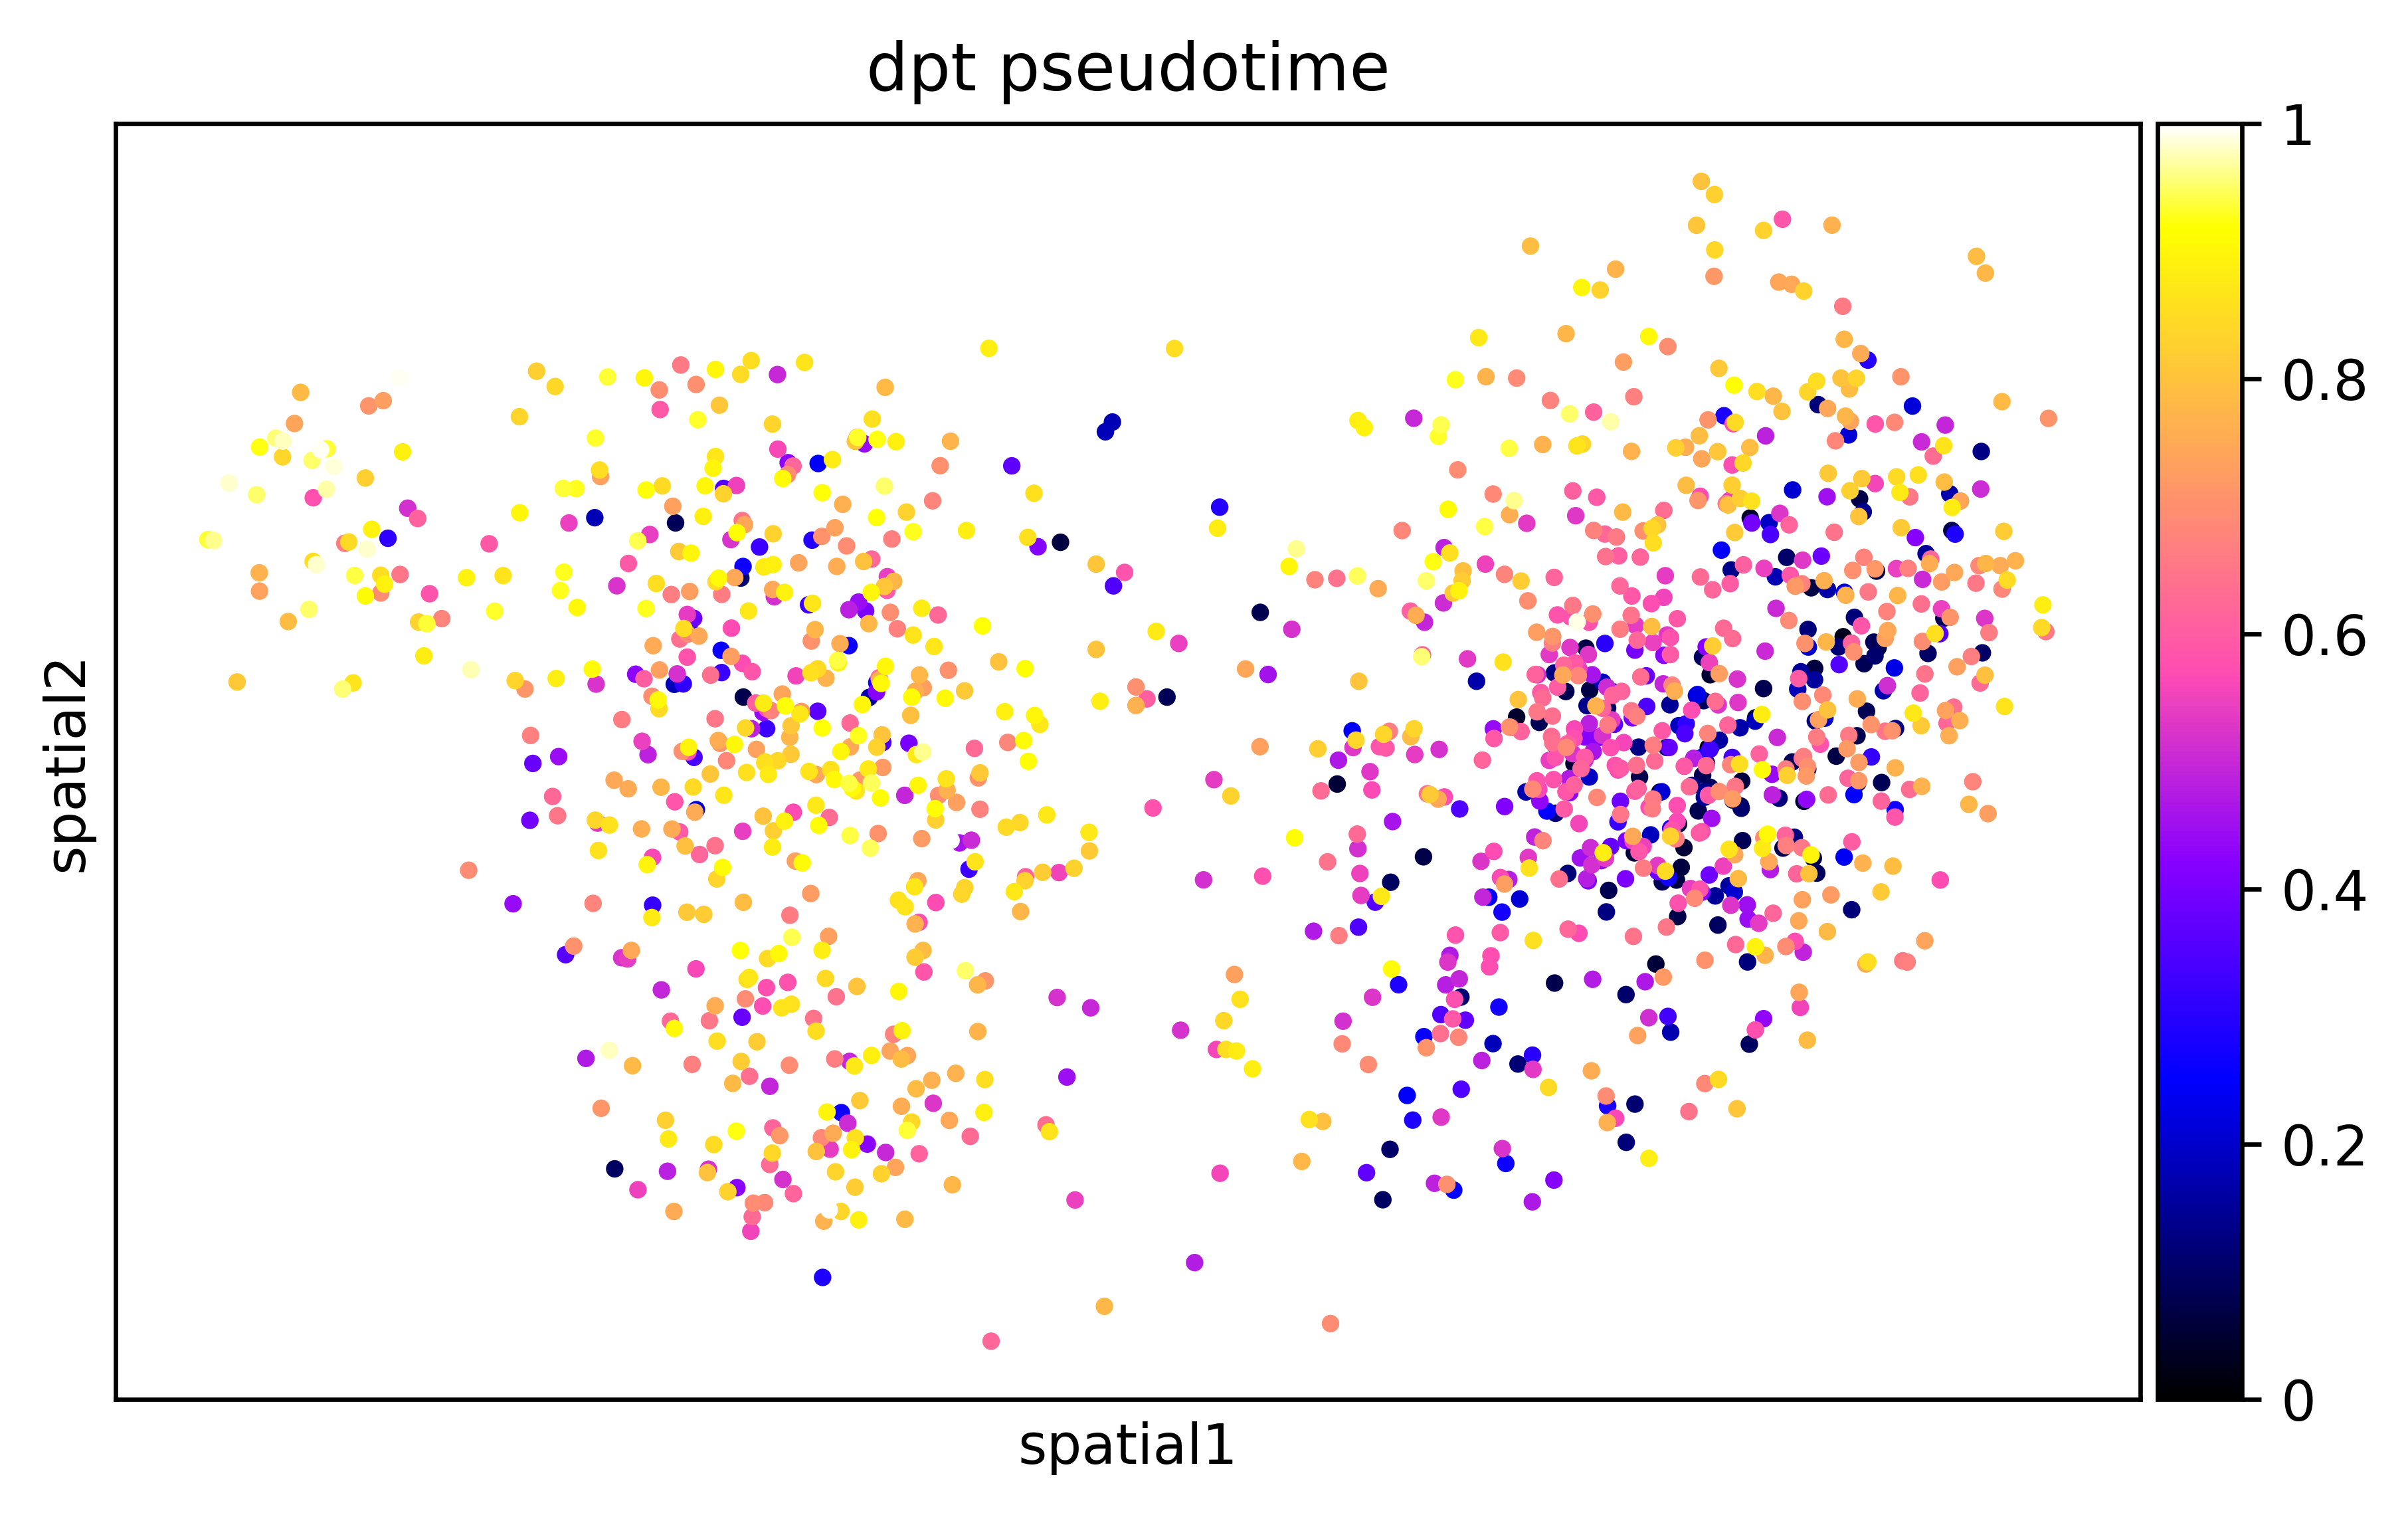

In [416]:
sc.pl.scatter(slide9,basis="spatial",color="dpt_pseudotime",
              color_map="gnuplot2",size=40)

In [417]:
st.spatial.trajectory.pseudotimespace_global(slide9,use_label="final_cluster_label2",list_clusters=[2,1],w=0)

Start to construct the trajectory: 2 -> 1


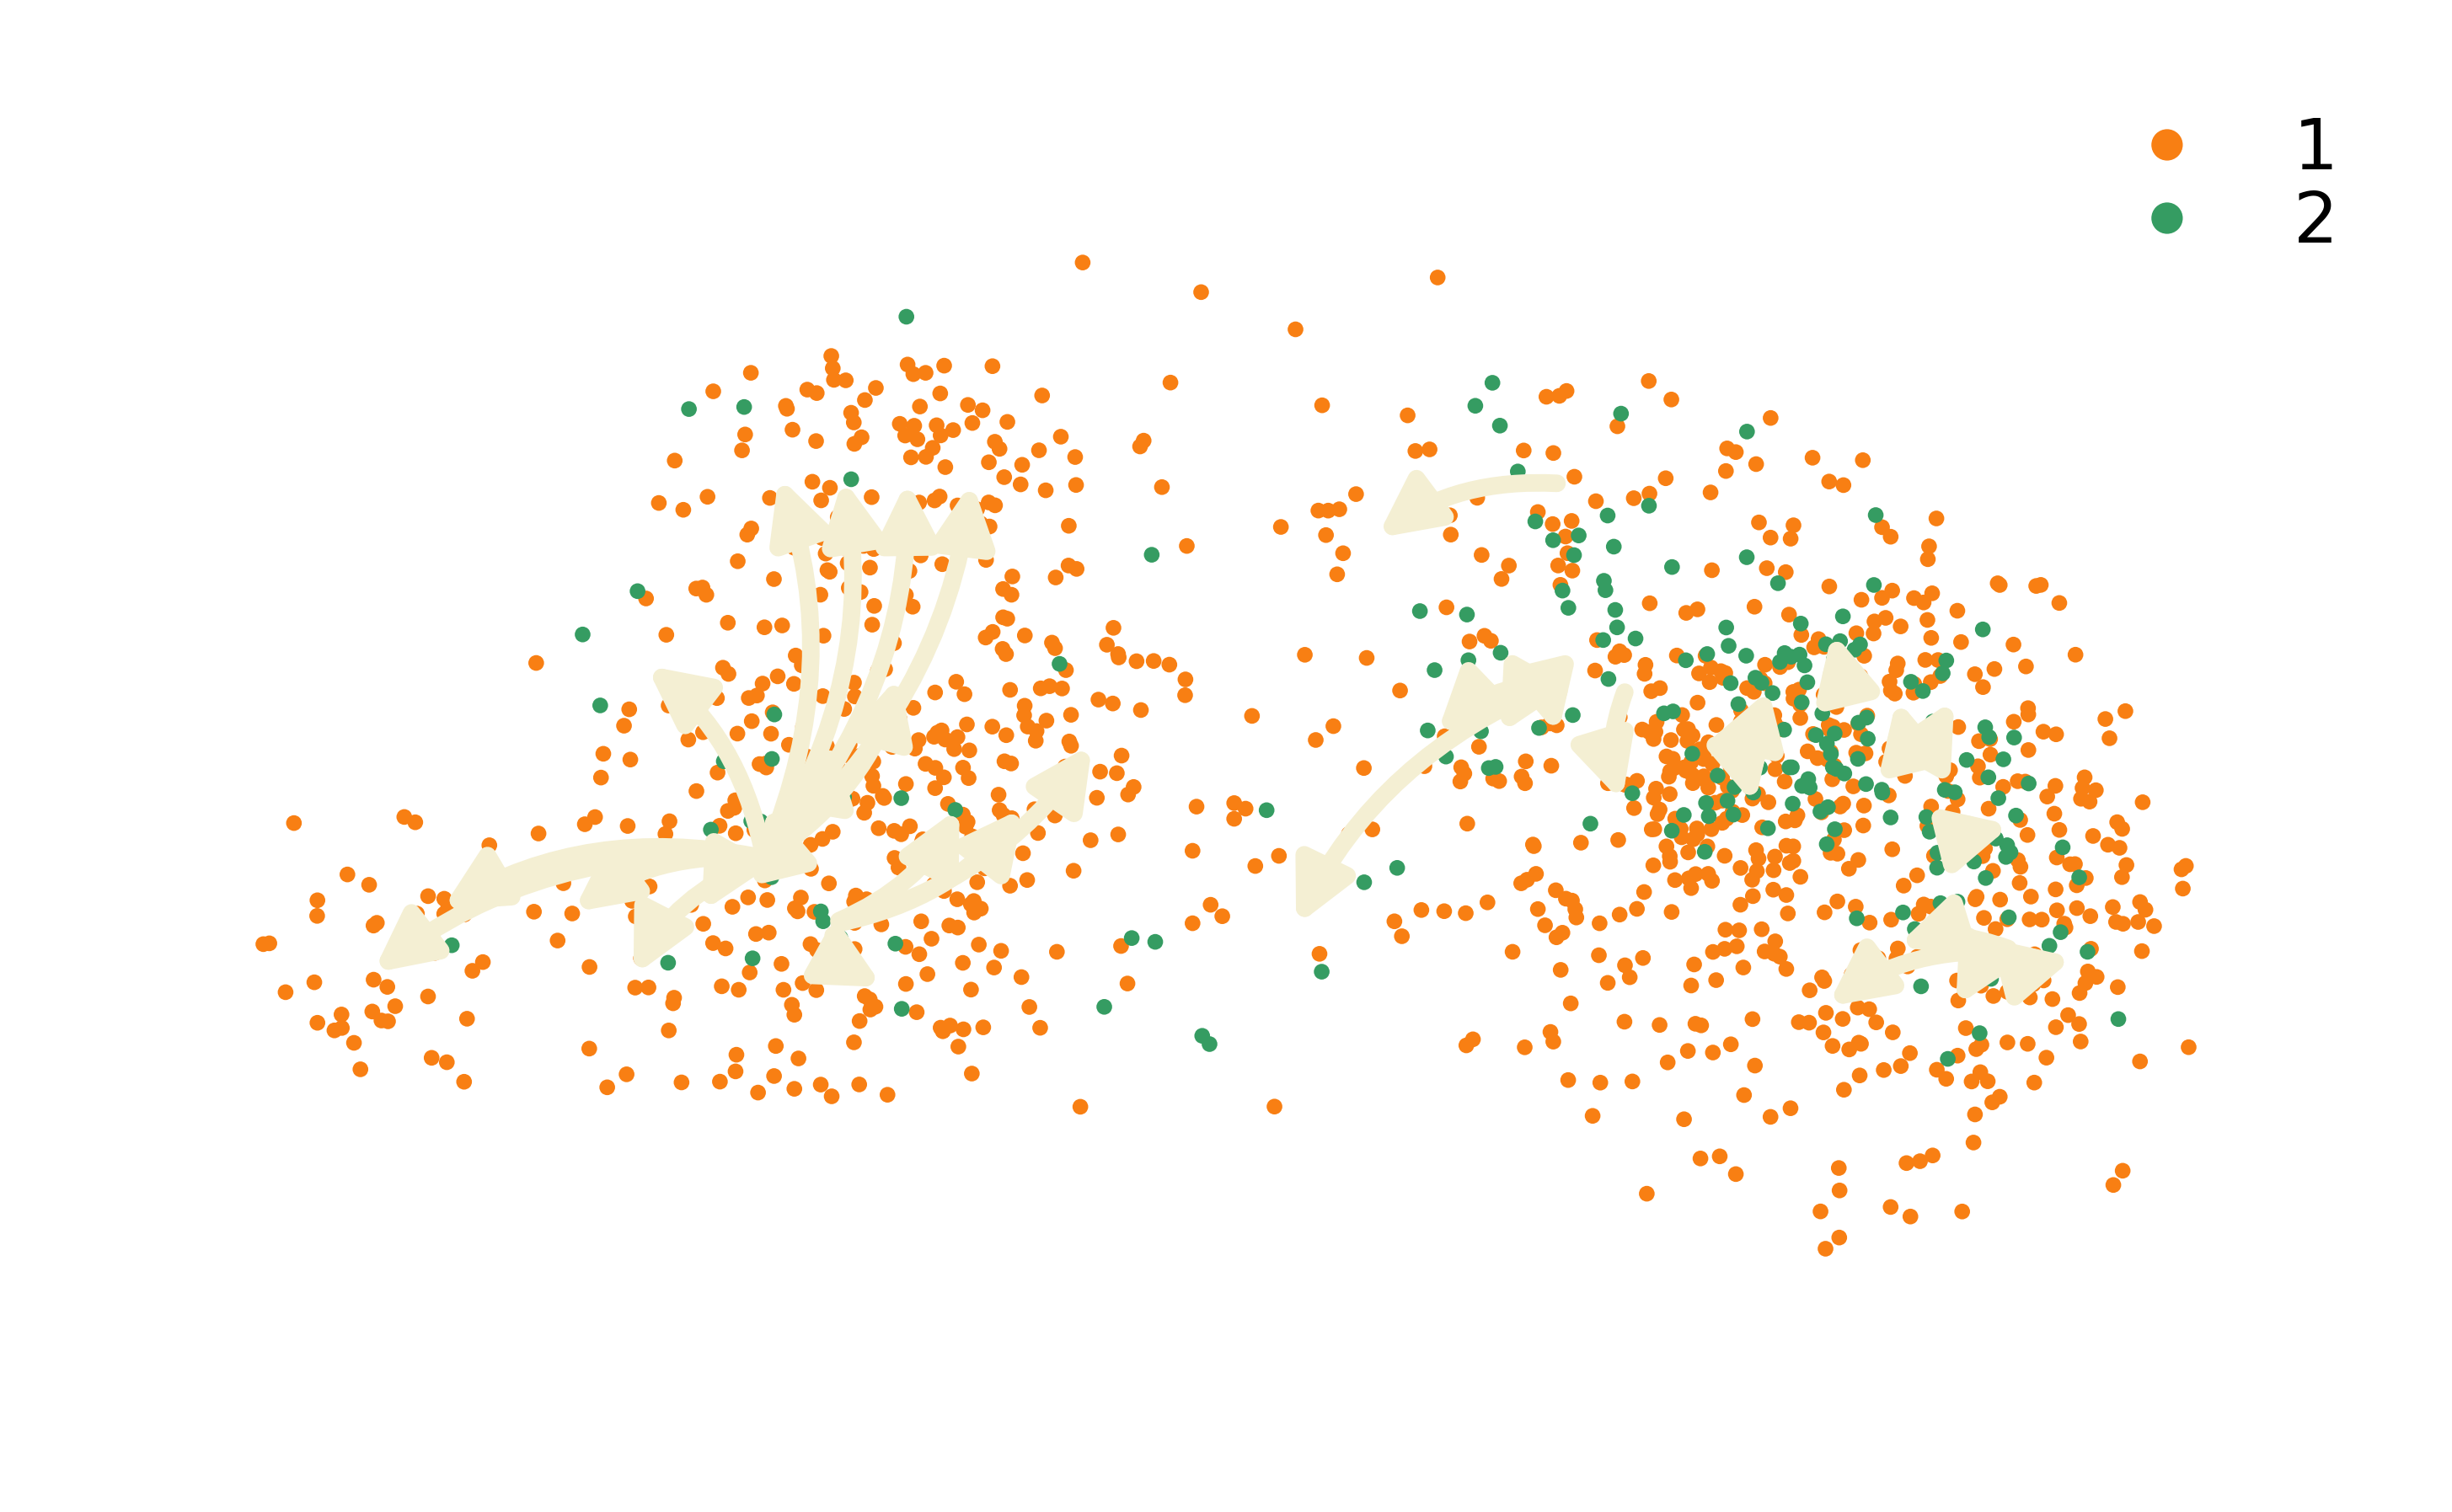

In [419]:
st.pl.cluster_plot(slide9,use_label="final_cluster_label2",show_trajectories=True,list_clusters=[1,2],show_subcluster=False)